# CO416 - Machine Learning for Imaging

# Tutorial 2 - Scikit Learn & Image Classification


## Regularisation 

Machine Learning models may overfit to your training data (as discussed in Lecture 2 from slide 35). To avoid overfitting we add to our loss function a regularisation term controlled by a weighting $\lambda$. 

In the lectures you learned about two elementary regularisers, the L1 and L2 regularisation also known as Lasso and Ridge penalty, respectively.



In [3]:
import numpy as np
import struct 
import gzip
import pandas as pd 
import sklearn
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.pipeline# adjust settings to plot nice figures inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

import warnings

import sys
sys.path.append('code')
from mli import plot_digit, plot_digits

warnings.filterwarnings('ignore')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [4]:
# data directory
data_dir = 'mnist'
import torchvision.datasets as dset

# train data
train_set = dset.MNIST(root=data_dir, train=True, download=False)
train_x_mnist = np.array(train_set.train_data) # trainning data 
train_y_mnist = np.array(train_set.train_labels) # trainning label 

print(train_x_mnist.shape)
print(train_y_mnist.shape)

# test data
test_set = dset.MNIST(root=data_dir, train=False, download=False)
test_x_mnist = np.array(test_set.test_data)# testing data 
test_y_mnist = np.array(test_set.test_labels)# testing label 


print(test_x_mnist.shape)
print(test_y_mnist.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
############################################################################
# Extract sample digits 
############################################################################

def sample_data_digits(data, labels, labels_to_select):
    # convert input 3d arrays to 2d arrays
    
    nsamples, nx, ny = data.shape
    
    data_vec = np.reshape(data,(nsamples,nx*ny))
   
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data_vec[selected_indexes]
    selected_labels = labels[selected_indexes]
    
    
    # Convert images from gray to binary by thresholding intensity values
    selected_data = 1.0 * (selected_data >= 128)

    # convert labels to binary: digit_1=False, digit_2=True
    selected_labels = selected_labels==labels_to_select[1]
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]
     
    return selected_data, selected_labels




In [6]:
from sklearn.manifold.t_sne import TSNE
from sklearn.neighbors.classification import KNeighborsClassifier
def plot_decision_boundary(model,X,y):
    Y_pred=model.predict(X)
    X_Train_embedded = TSNE(n_components=2).fit_transform(X)
    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
    X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, Y_pred) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
    plt.show()


## Using Regularisers 

We will first use a toy example to better understand the concept of regularisation. The dataset to be used here is the *'make moons'* one which can be directly used from sklearn

**TASK**
- Train a SGD classifier with `loss='log'` to implement a logistic regression. 
- Use all regularisations and evaluate the performance of your model.
- Does your model overfit less or more after reguralization ? 

As you saw regularization does not affect the performance when the feature space is small. In order then to augment our feature space we make polynomial combinations of the existing features.

- Using sklearns sklearn.preprocessing.PolynomialFeatures with different order polynomials we can create polynomial combinations of our features. 


X shape (1000, 2) Y shape (1000,)
training x is  (800, 2) training y is (800,)


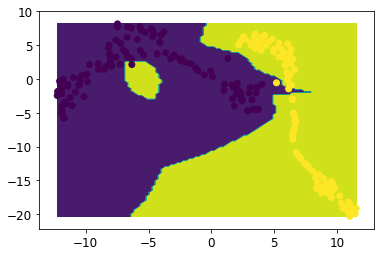

In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)

X, Y = make_moons(1000, noise=0.1)
#####################################################################
# Perform a train test split , use 20% of your dataset for testing.
#####################################################################
print('X shape', X.shape,'Y shape',Y.shape)
# ADD YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print('training x is ', X_train.shape,'training y is', y_train.shape)
# model.fit(X_train, y_train)
# plot_decision_boundary(model, X_test, y_test)
#####################################################################
# Perform a polynomial feature transform  use degree 10 to start and then explore different polynomial degrees
#####################################################################

# ADD YOUR CODE HERE

Pol = PolynomialFeatures(10)
x_train_poly = Pol.fit_transform(X_train)
x_test_poly = Pol.fit_transform(X_test)

model = SGDClassifier(loss='log', penalty = 'l2')
model.fit(x_train_poly, y_train)
# print(X_train_new.shape)
#####################################################################
# Plot the decision boundary 
#####################################################################
# plot_decision_boundary(model, x_test_poly, y_test)
# plot_decision_boundary(model, X_test, y_test)
plot_decision_boundary(model, x_test_poly, y_test)


## Diving Deeper 

Now we will move back to the MNIST dataset. Extract from the dataset digits 0 and 8.

**TASK**

Below you will find the model solution for the logistic regression classifier as defined in Tutorial 1. 
- Modify this class to take one more argument that is the penalty and apply the penalty function to the loss. (done)
- Implement L1 and L2 regularisations not the elastic net.
- Use your model and comment on how regularisation alters the performance 

See the lecture notes at Lecture 2 slide 39-41 

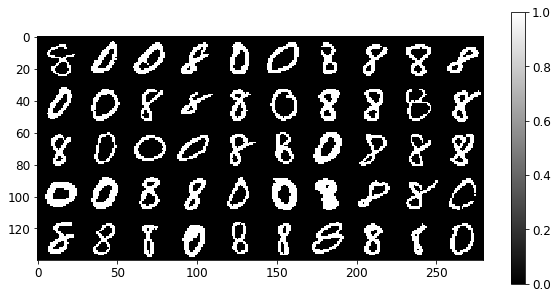

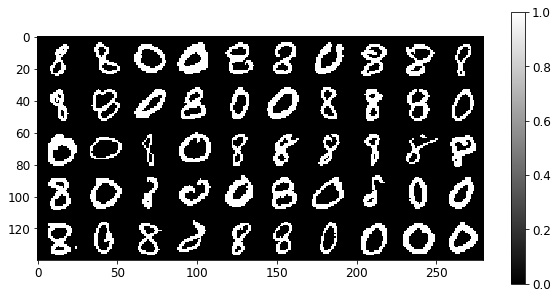

In [6]:
###########################################################################
# Extract ones and eights digits from both training and testing data 
############################################################################
labels_to_select = [0,8]


# ADD YOUR CODE HERE
selected_train_data, selected_train_labels = sample_data_digits(train_x_mnist, train_y_mnist,labels_to_select)
selected_test_data, selected_test_labels = sample_data_digits(test_x_mnist, test_y_mnist,labels_to_select )

# plot sampled digits
plot_digits(selected_train_data[0:50])
plt.show()
plot_digits(selected_train_data[8000:8050])
plt.show()


In [15]:
from sklearn.base import BaseEstimator, ClassifierMixin
class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.05, num_iter=1000, add_bias=True, verbose=True,lambda_val=0.5,penalty='L1'):
        self.lr = lr
        self.lambda_val = lambda_val
        self.verbose = verbose
        self.num_iter = num_iter
        self.add_bias = add_bias
        self.penalty = penalty
        
    
    def __add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        return np.concatenate((bias, X), axis=1)
    

    ############################################################################
    #  compute the loss + ADD YOUR PENALTY HERE
    ############################################################################
    def __loss(self, h, y):
        ''' computes loss values '''
        y = np.array(y,dtype=float)
        
        
        reg=0 # ADD YOUR CODE HERE
        reg += self.lambda_val * 0.5 * np.dot(self.theta.T,self.theta)
            
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)+ reg ).mean()

    
    def fit(self, X, y):
        ''' 
        Optimise our model using gradient descent
        Arguments:
        X input features
        y labels from training data
            
        '''
        if self.add_bias:
            X = self.__add_bias(X)
        
        
        ############################################################################
        #initialise weights randomly with normal distribution N(0,1)
        ############################################################################
        self.theta = np.random.normal(0.0,0.01,X.shape[1])
        
        for i in range(self.num_iter):
            ############################################################################
            #  forward propagation
            ############################################################################
            z = X.dot(self.theta)
            h = 1.0 / (1.0 + np.exp(-z))
            ############################################################################
            #  backward propagation + ADD YOUR PENALTY HERE
            ############################################################################
            # update parameters
            
            # ADD YOUR CODE HERE
            reg=0
            self.theta -= (self.lr * ( np.dot(X.T, (h - y))+reg) - self.lambda_val*np.dot(self.theta.T,self.theta))/ y.size


            ############################################################################
            # print loss
            ############################################################################
            if(self.verbose == True and i % 50 == 0):
                h = 1.0 / (1.0 + np.exp(-X.dot(self.theta)))
                print('loss: {} \t'.format(self.__loss(h, y)))
    
    def predict_probs(self,X):
        ''' returns output probabilities
        '''
        ############################################################################
        # forward propagation
        ############################################################################
        if self.add_bias:
            X = self.__add_bias(X)
        z = X.dot(self.theta)
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X, threshold=0.5):
        ''' returns output classes
        '''
        return self.predict_probs(X) >= threshold
    
    def score(self, X,Y):
        '''
            Returns accuracy of model
        '''
        preds = self.predict(X)
        accuracy = (preds == Y).mean()
        return accuracy
    

### Deploying Regressor with regularisation

In order to see the full effect of the regularisation we look into a scenario where the classifier clearly overfits. We will only use a small portion of the MNIST dataset, with 75 data points to begin with and then experiment with other values.

**TASK**

- Train your logistic regressor with 75 training datapoints, learning rate=1e-3 and 10,000 iteration and all possible penalties
- Evaluate the performance of your model, using model.score(X,Y)
- Use the weight plotting function from Tutorial 1 and comment on how reguralization affects them (Hint see slide 41 from lecture 2) 

loss: 0.6212237348959199 	
loss: 0.47616645509345823 	
loss: 0.6527735464147202 	
loss: 0.7998464170126918 	
loss: 0.9270378756586688 	
loss: 1.040433311587027 	
loss: 1.1436526232991462 	
loss: 1.2390102606713493 	
loss: 1.3280823453020143 	
loss: 1.4119964463412262 	
loss: 1.4915910160758106 	
loss: 1.5675090528652478 	
loss: 1.6402562011651964 	
loss: 1.7102384493504248 	
loss: 1.7777875245219166 	
loss: 1.843178549471868 	
loss: 1.9066426556232696 	
loss: 1.9683762052426368 	
loss: 2.028547672699445 	
loss: 2.0873028713756963 	
0.9902327161542381


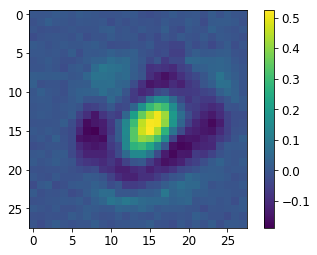

loss: 0.627666477488444 	
loss: 0.4734818916406264 	
loss: 0.6504858549562614 	
loss: 0.7979613714875292 	
loss: 0.9255126279341573 	
loss: 1.0392257760345156 	
loss: 1.1427276736199221 	
loss: 1.2383396679924885 	
loss: 1.3276436130391902 	
loss: 1.411771619982833 	
loss: 1.4915656904420032 	
loss: 1.5676715915292891 	
loss: 1.6405971348028414 	
loss: 1.7107500144957286 	
loss: 1.7784633096462694 	
loss: 1.8440132223659509 	
loss: 1.907631752288592 	
loss: 1.9695159654280276 	
loss: 2.029834910959806 	
loss: 2.088734875322833 	
0.9902327161542381


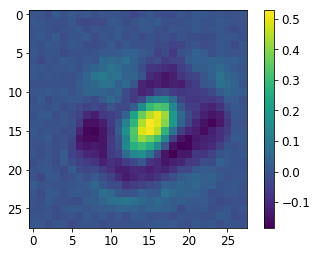

loss: 0.6258190953735369 	
loss: 0.4742840526109992 	
loss: 0.6510519660822799 	
loss: 0.7982496963591968 	
loss: 0.9255283611137809 	
loss: 1.038978433443123 	
loss: 1.1422259140203284 	
loss: 1.237590612602264 	
loss: 1.3266529821536437 	
loss: 1.410544004111028 	
loss: 1.490104804468656 	
loss: 1.5659804819066034 	
loss: 1.6386783405097183 	
loss: 1.7086056895834176 	
loss: 1.7760953156817718 	
loss: 1.8414231978610849 	
loss: 1.9048211647281938 	
loss: 1.9664861502057676 	
loss: 2.0265871004814575 	
loss: 2.085270220727788 	
0.9903176490572447


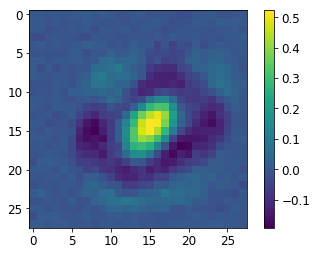

In [13]:
#########################################################################
# Q: train our model using raw pixels , train for all penalties and for various lambda values
#########################################################################
for pen in ['None','L1','L2']:
    for lam_val in [0.7]:
      
        #########################################################################
        # Q: Evaluate the trained model - compute train and test accuracies
        #########################################################################
        
        # ADD YOUR CODE HERE
        model = LogisticRegression(lambda_val=lam_val,penalty=pen)
        model.fit(selected_train_data, selected_train_labels)
        accur = model.score(selected_train_data, selected_train_labels)
        print(accur)
        #########################################################################
        # Q: draw trained model params (weights) as an image of size (28x28)
        #########################################################################
        plt.imshow(model.theta[:-1].reshape(28,28))
        plt.colorbar()
        plt.show()


### Regularisation using sklearn
Now that we know how to implement logistic regression with L1 and L2 regularisation on numpy lets use an industry standard version - sklearn 

**TASK**

Use sklearns SGD classifier with the `loss='log'` to perform logistic regression, you can change the penalty function by changing the `penalty` argument 
- Use all 10 classes
- Do you get different performance ? 
- Why is there a difference ? 

In [9]:
############################################################################
############################################################################
# reshape to (N,728) this is number of samples N and the nuber of features 28x28=728
x_train=np.reshape(train_x_mnist,(train_x_mnist.shape[0],train_x_mnist.shape[1]*train_x_mnist.shape[2]))
x_test=np.reshape(test_x_mnist,(test_x_mnist.shape[0],test_x_mnist.shape[1]*test_x_mnist.shape[2]))

train_y_mnist = np.array(train_set.train_labels) # trainning label 

# test data
test_y_mnist = np.array(test_set.test_labels)# testing label 

# train_y_mnist
# test_y_mnist

print(x_train.shape)
print(train_y_mnist.shape)

print(x_test.shape)
print(test_y_mnist.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


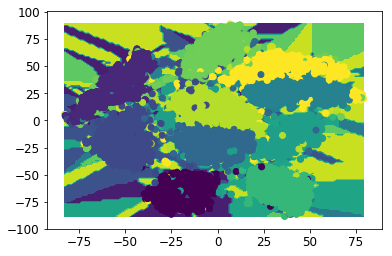

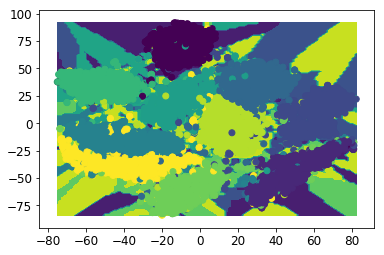

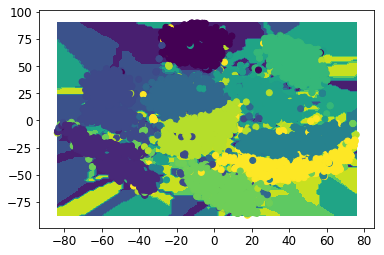

In [14]:
############################################################################
############################################################################
# No Regularisation 
############################################################################

# ADD YOUR CODE HERE

modelSGD = SGDClassifier(loss='log', penalty = 'none')
modelSGD.fit(x_train, train_y_mnist)
plot_decision_boundary(modelSGD, x_test, test_y_mnist)

############################################################################
# L1 Reguralization 
############################################################################

# ADD YOUR CODE HERE
modelSGD = SGDClassifier(loss='log', penalty = 'l1')
modelSGD.fit(x_train, train_y_mnist)
plot_decision_boundary(modelSGD, x_test, test_y_mnist)

############################################################################
# L2 Reguralization 
############################################################################

# ADD YOUR CODE HERE
modelSGD = SGDClassifier(loss='log', penalty = 'l2')
modelSGD.fit(x_train, train_y_mnist)
plot_decision_boundary(modelSGD, x_test, test_y_mnist)


## Validation 

As you have seen so far the performance of your models heavily depend on the values of the hyperparameters you choose. As we do not know a priori how these would affect the test accuracy we reserve a portion of our training data to use as a validation set. Using the test set is forbidden as this constitutes data-snooping and it makes our experiments null, and we would find unrealistic performance in the real world. 

**TASK**
- Using sklearns SGD classifier with log loss alter the validation portion.
- Build your own validation scheme. 
   - Use the train-val-test split function and also determine a set of possible values for your hyperparameters (use different learning rates and different $\lambda$ values for the regulariser (in sklearn the name the parameter to be $\alpha$).
   - Iterate though your possible values and evaluate the performance of your algorithm with the validation set 
   - Determine the best hyperparameters based on the performance on the validation set
   - Execute a complete training and evaluate the models performance on the testing set
   

In [11]:
from sklearn.model_selection import train_test_split
############################################################################
# Split into train and val test_size=0.10, random_state=42
############################################################################
# ADD YOUR CODE HERE
#Initialize best values
best = # ADD YOUR CODE HERE
############################################################################
# Iterate over selected values
############################################################################
for lr in [1e-2,1e-3,1e-6]:
    for al in [0.5,0.1,0.01]:
        
        # ADD YOUR CODE HERE
        
 # print best hyperparameters and accuracy   
print(best)

SyntaxError: invalid syntax (<ipython-input-11-3cd56d2da425>, line 7)

### Bonus 
- Implement an Elastic Net and then compare it with sklearns implementation. 
- Redo all the above tests with this.